In [2]:
import pandas as pd            # as 是对包或模块重命名
# import pandas.io.data as web   # 导入包和模块，模块可能随着版本的不同会发生变化ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). 
# After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader),
#  you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.

import pandas_datareader.data as web 
import datetime
 


In [3]:
import pandas as pd
import pandas_datareader.data as web   
import datetime
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
apple = web.DataReader("AAPL", "yahoo", start, end)
 
#  web.DataReader("AAPL", "yahoo", start, end)会出现下处错误
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date

# if yahoo forbidden using "pip install fix_yahoo_finance"
 


In [ ]:
 
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()
 
start=datetime.datetime(2006, 1, 1)
end=datetime.datetime(2012, 1, 1)
apple=web.get_data_yahoo('AAPL',start,end)
apple
	
apple.head()
 

# start=datetime.datetime(2017, 1, 1)
# end=datetime.datetime.today()
# apple=web.get_data_yahoo('AAPL',start,end)
# apple


Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Date'>

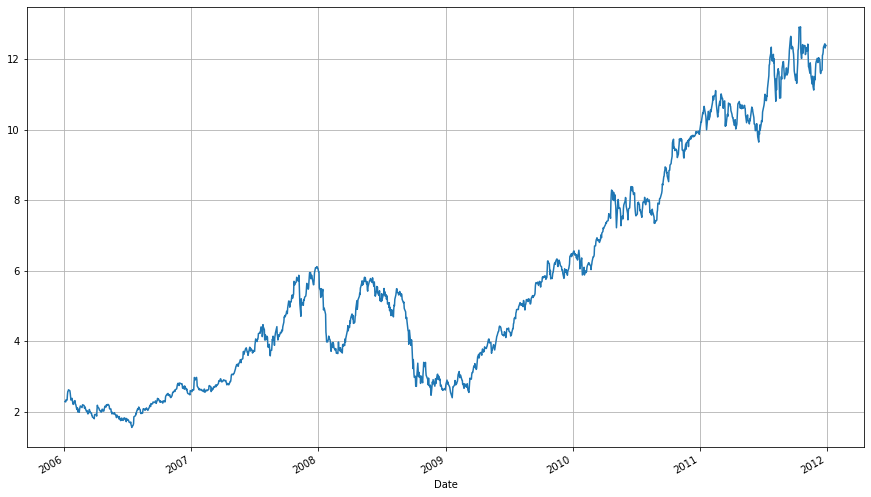

In [17]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
 
# Control the default size of figures in this Jupyter notebook
%pylab inline
 
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

C:\vnstudio\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


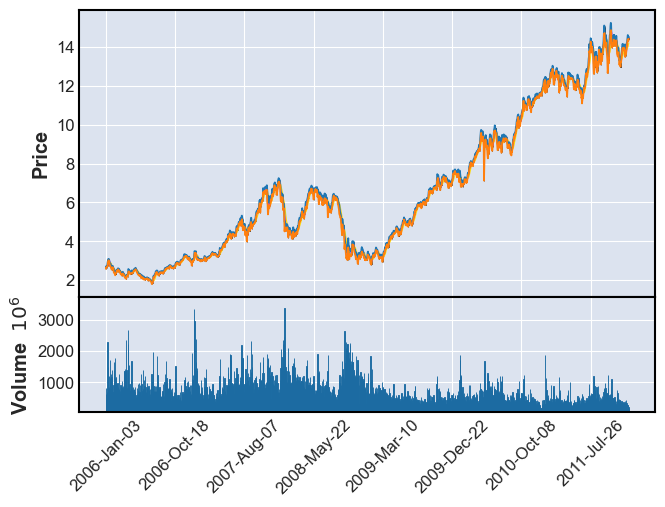

In [21]:
add_plot = mpf.make_addplot(apple[['High',  'Low']])

# mpf.plot(apple, type='candle', addplot=add_plot)
mpf.plot(apple, type='candle',addplot=add_plot, mav=(2, 5, 10), volume=True)

AttributeError: module 'mplfinance' has no attribute 'candlestick_ohlc'

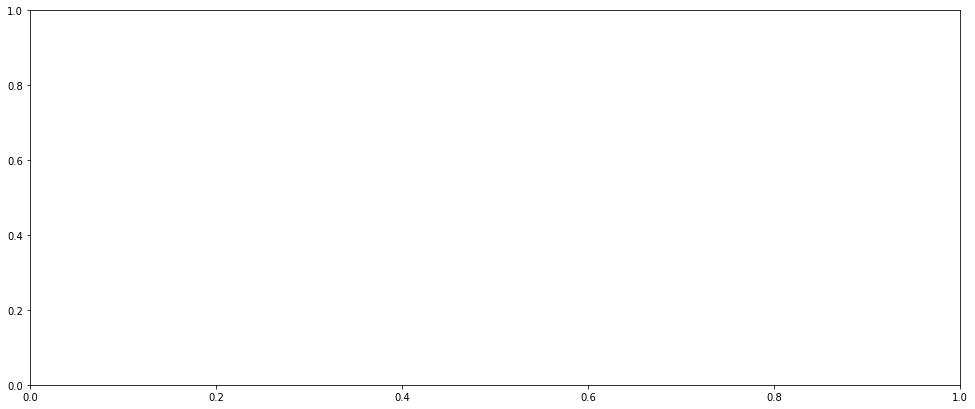

In [11]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import mplfinance as mpf
from matplotlib.ticker import Formatter
import numpy as np
 
 
dfcvs = DataFrame([
    ["2018/09/17-21:34", 3646, 3650,3644,3650],
    ["2018/09/17-21:35", 3650, 3650,3648,3648],
    ["2018/09/17-21:36", 3650, 3650,3648,3650],
    ["2018/09/17-21:37", 3652, 3654,3648,3652]
])
 
dfcvs.columns = ['时间','开盘','最高','最低','收盘']
dfcvs['时间']=pd.to_datetime(dfcvs['时间'],format="%Y/%m/%d-%H:%M")
 
#matplotlib的date2num将日期转换为浮点数，整数部分区分日期，小数区分小时和分钟
#因为小数太小了，需要将小时和分钟变成整数，需要乘以24（小时）×60（分钟）=1440，这样小时和分钟也能成为整数
#这样就可以一分钟就占一个位置
 
 
 
dfcvs['时间']=dfcvs['时间'].apply(lambda x:dates.date2num(x)*1440)
# data_mat=dfcvs.as_matrix()
data_mat=dfcvs.iloc[:,:].values
# train_np = train_df.iloc[:,:].values
    
fig,ax=plt.subplots(figsize=(1200/72,480/72))
 
fig.subplots_adjust(bottom=0.1)   
mpf.candlestick_ohlc(ax,data_mat,colordown='#53c156', colorup='#ff1717',width=0.2,alpha=1)
 
#将x轴的浮点数格式化成日期小时分钟
#默认的x轴格式化是日期被dates.date2num之后的浮点数，因为在上面乘以了1440，所以默认是错误的
#只能自己将浮点数格式化为日期时间分钟
#参考https://matplotlib.org/examples/pylab_examples/date_index_formatter.html
class MyFormatter(Formatter):
            def __init__(self, dates, fmt='%Y%m%d %H:%M'):
                self.dates = dates
                self.fmt = fmt
    
            def __call__(self, x, pos=0):
                'Return the label for time x at position pos'
                ind = int(np.round(x))
                #ind就是x轴的刻度数值，不是日期的下标
 
                return dates.num2date( ind/1440).strftime(self.fmt)
        
formatter = MyFormatter(data_mat[:,0])
ax.xaxis.set_major_formatter(formatter)
 
for label in ax.get_xticklabels():
            label.set_rotation(90)
            label.set_horizontalalignment('right')
           
plt.show()

In [8]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
from mpl_finance import quotes_historical_yahoo
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(apple)

ModuleNotFoundError: No module named 'matplotlib.finance'